<h3><center> Playing with toy dataset using SVMs and visualizing the decision boundary </center></h3>

In [1]:
#import svm from sklearn library
from sklearn import svm
#importing matplotlib to visualize the dataset
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#feature matrix
X = [[6,3],[7,8],[5,9],[3,2],[2,6],[3,6],[-1,-1],[-2,3],[0,6],[0,8],[5,5.5],[5,5],[3,7],[-2,9]]
#labels vector
Y = [1,1,0,0,1,1,0,0,0,1,1,1,1,0]

In [3]:
#function separating positive and negative samples
def separate(X, Y):
    """
    Inputs:
    -> X - feature matrix
    -> Y - labels vector
    Returns:
    -> positive - matrix holding features of positive samples
    -> negative - matrix holding features of negative samples
    """
    positive = []
    negative = []

    for i, label in enumerate(Y):

        if label:
            positive.append(X[i])
        else:
            negative.append(X[i])
    
    return positive, negative    

In [4]:
positive, negative = separate(X, Y)
print(positive)
print(negative)

[[6, 3], [7, 8], [2, 6], [3, 6], [0, 8], [5, 5.5], [5, 5], [3, 7]]
[[5, 9], [3, 2], [-1, -1], [-2, 3], [0, 6], [-2, 9]]


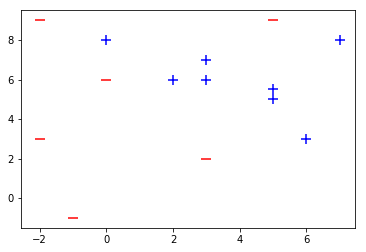

In [5]:
#plotting the samples
plt.scatter([sample[0] for sample in positive], [sample[1] for sample in positive], marker='+', c='b', s=100)
plt.scatter([sample[0] for sample in negative], [sample[1] for sample in negative], marker='_', c='r', s=100)
plt.show()

In [6]:
#utilizing SVM Classifier on the dataset
clf = svm.SVC()
clf.fit(X,Y)

#sanity check
clf.predict([[5,5],[0,4.5]])

array([1, 0])

#### See what a meshgrid looks like

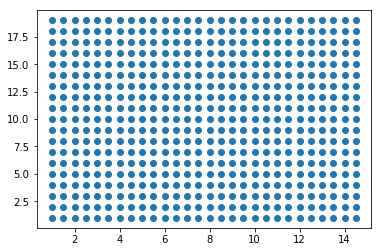

In [7]:
#if we want to plot the decision boundary of the SVM algorithm,
#we can use a meshgrid, depicted below (it creates many points,
#for which we can predict the label. Based on the predictions,
#we will plot a decision boundary)

#import numpy for creating a meshgrid
import numpy as np

#create a meshgrid
mesh = np.meshgrid(np.arange(1,15,.5),np.arange(1,20,1))
 
#plot meshgrid using scatterplot
plt.scatter(mesh[0],mesh[1])
plt.show()

#### Now we will plot the decision boundary

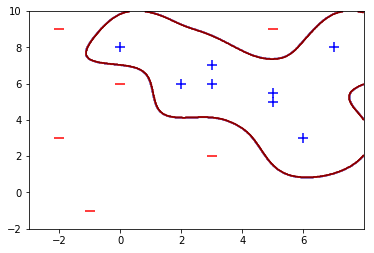

In [8]:
#converting X and Y lists to numpy arrays (it will make matrix operations easier)
X = np.array(X)
Y = np.array(Y)

#stepsize in the mesh
h = .02
#creating a meshgrid
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#predict the labels of the points in the meshgrid
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

#plotting our dataset and decision boundary
plt.contour(xx, yy, Z, cmap=plt.cm.seismic)
plt.scatter([sample[0] for sample in positive], [sample[1] for sample in positive], marker='+', c='b', s=100)
plt.scatter([sample[0] for sample in negative], [sample[1] for sample in negative], marker='_', c='r', s=100)
plt.show()